## Tarea 1
Utilizando el dataset visto en clase dataHP.csv, desarrollar los procesos de ingeniería de características para proprocesar el dataset. Deberá aplicar la imputación de datos y la codificación de variables categóricas. Puede utilizar los criterios que quiera para cada caso. Deberá explicar cada paso realizado y por qué tomó cada decisión en particular.
El proceso debe aplicarse a todas las columnas que lo requieran, tanto numéricas como categóricas.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/train_HP.csv') 
original = df
original2=pd.read_csv('../data/train_HP.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Imputación de datos
1. Después de cargar los datos, es útil obtener una descripción general de los mismos.
2. A partir de aquí, la tarea se divide en dos partes: imputación de datos y codificación de variables categóricas.
3. La imputación de datos es el proceso de sustituir los valores perdidos por estimaciones. La elección de la técnica de imputación depende de la naturaleza de los datos y el tipo de análisis que se realizará. Para las variables numéricas, a menudo se utiliza la media o la mediana. Para las variables categóricas, a menudo se utiliza la moda.
4. Se mostrara algunos ejemplos para columnas especificos y hasta el final se aplicara a todas

In [2]:
# Por ejemplo, digamos que LotFrontage es una variable numérica con valores faltantes. Podemos rellenar los valores faltantes con la mediana
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
#Para las variables categóricas, como Alley, podemos rellenar los valores perdidos con la moda (el valor más común).
df['Alley'] = df['Alley'].fillna(df['Alley'].mode()[0])

### Codificación de Variables Categóricas
La codificación de variables categóricas es el proceso de convertir variables categóricas en una forma que pueda ser proporcionada a los algoritmos de ML para mejorar la predicción. Las técnicas de codificación de variables categóricas incluyen One-Hot Encoding, Label Encoding, Ordinal Encoding, etc.

In [3]:
#Por ejemplo, para hacer One-Hot Encoding de la variable categórica MSZoning
df = pd.get_dummies(df, columns=['MSZoning'])
#Y para la codificación de etiquetas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Street'] = le.fit_transform(df['Street'])

### Tratamiento de Valores Atípicos
Los valores atípicos pueden afectar significativamente los resultados de nuestro modelo. Estos son valores que son significativamente diferentes del resto de los datos. Hay muchas técnicas para manejar los valores atípicos, desde eliminarlos hasta utilizar modelos robustos a los valores atípicos.

In [4]:
from scipy.stats import zscore
z_scores = zscore(df['LotArea']) 
df = df[np.abs(z_scores) < 3]

### Escalado de Características
Algunos algoritmos de Machine Learning, como SVM y KNN, se ven afectados por la escala de las características. En estos casos, es útil escalar nuestras características a un rango específico. Scikit-learn tiene varias funciones para esto, como MinMaxScaler y StandardScaler.

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['LotArea'] = scaler.fit_transform(df[['LotArea']])

### Tratamiento de Variables Temporales
A veces, las fechas pueden ser difíciles de manejar. Sin embargo, se pueden extraer características muy interesantes a partir de estas. Por ejemplo, si tienes una columna de fecha, puedes extraer el año, mes, día de la semana, etc.

In [6]:
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y')  # Suponiendo que YearBuilt está en formato de cadena
df['YearBuilt_year'] = df['YearBuilt'].dt.year
df['YearBuilt_month'] = df['YearBuilt'].dt.month
df['YearBuilt_day'] = df['YearBuilt'].dt.day

### Transformación de Variables
Una distribución normal, puedes aplicar una transformación para intentar hacer que la distribución sea más normal. Los ejemplos comunes incluyen la transformación logarítmica, la raíz cuadrada y la inversa.

In [10]:
df =original2
df['LotArea_log'] = np.log(df['LotArea'])
dummies = pd.get_dummies(df['MSZoning'], prefix='MSZoning')
df = pd.concat([df, dummies], axis=1)
df = df.drop('MSZoning', axis=1)

### Tratamiento de Datos Faltantes
Es común que los conjuntos de datos tengan valores faltantes. Hay varias maneras de tratar con ellos, y la mejor opción depende del contexto. Algunas opciones incluyen:

Eliminar las filas con datos faltantes.
Imputar los valores faltantes con la media, mediana o moda.
Imputar los valores faltantes utilizando un método más avanzado, como KNN Imputer o MICE Imputer.

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['LotFrontage'] = imputer.fit_transform(df[['LotFrontage']])

## Metodo general aplicando a todo

In [12]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### 1. Tratamiento de los datos faltantes
Para las variables numéricas, se rellenan los datos los datos faltantes con la mediana, y para las variables categóricas, se pueden rellenar con el valor más frecuente o una categoría separada como 'Desconocido'.

In [13]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

### 2. Codificación de variables categóricas
Para las variables categóricas, puedes utilizar la codificación OneHot para convertirlas en variables numéricas. Ten en cuenta que este proceso aumentará la dimensionalidad de tus datos.

In [14]:
encoder = OneHotEncoder(handle_unknown='ignore')

### 3. Escalado de las características numéricas
Para las variables numéricas, es una buena práctica reescalarlas para que todas estén en el mismo rango. Esto es especialmente útil para los algoritmos de aprendizaje automático que utilizan la distancia euclidiana en sus cálculos.

In [15]:
scaler = StandardScaler()
# Se aplica todo
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_pipeline = Pipeline(steps=[
    ('num_imputer', num_imputer),
    ('scaler', scaler)
])

cat_pipeline = Pipeline(steps=[
    ('cat_imputer', cat_imputer),
    ('encoder', encoder)
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])
X_transformed = preprocessor.fit_transform(df)

### 4. Filtrado de datos

In [16]:
# Opcion 1: Z Score
from scipy import stats
z_scores = stats.zscore(df[num_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [17]:
#Opción 2: Metodo intercuartil
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Opción 2 de metodo de filtrado

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
df = pd.read_csv('../data/train_HP.csv')
print(df.head())
print(df.isnull().sum())
print(df.dtypes)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [20]:
#Ahora, manejaremos los datos faltantes y atípicos en las columnas numéricas y categóricas.

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
        
    elif df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
        
        # Manejo de valores atípicos usando el método del rango intercuartil (IQR)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


In [21]:
print(df.describe())
print(df.describe(include=['O']))

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.090411   9647.388014     6.100685   
std     421.610009    37.508183    17.231909   3594.356399     1.378430   
min       1.000000    20.000000    31.500000   1481.500000     2.000000   
25%     365.750000    20.000000    60.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000  11601.500000     7.000000   
max    1460.000000   145.000000   107.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    89.406336   439.997517  ...   
std       0.963696    30.108397     20.645407   134.017553   433.219435  ...   
min 

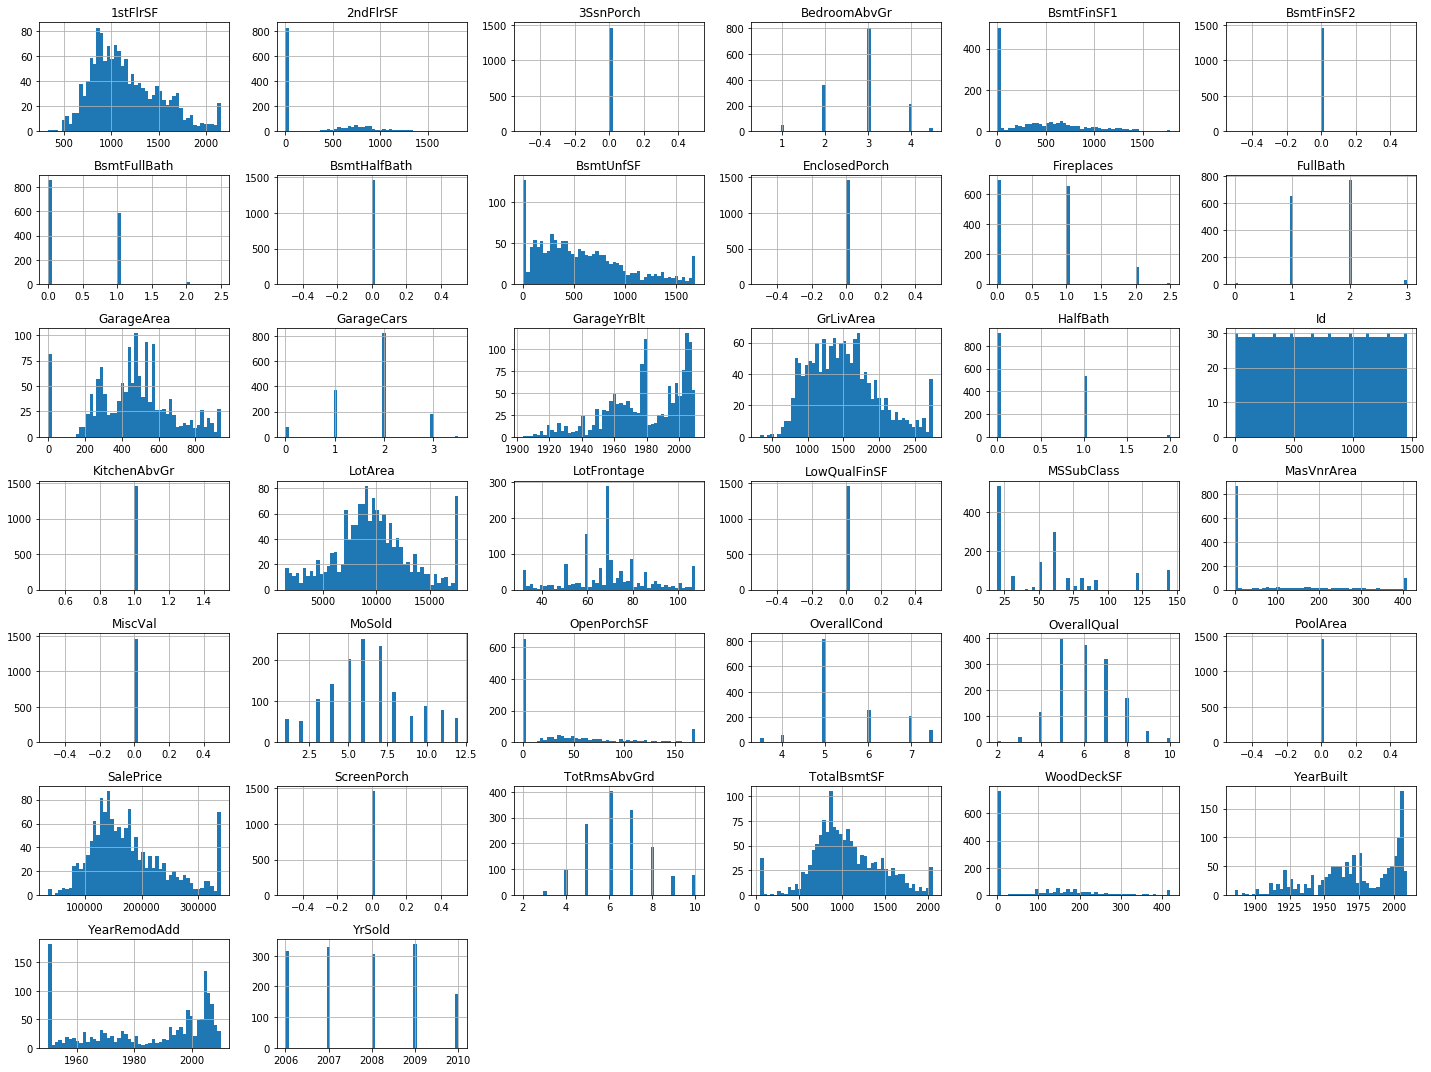

In [22]:
# Histogramas para las columnas numéricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

Vamos a examinar si nuestros datos siguen una distribución normal. Esto es importante porque muchos modelos de machine learning asumen que los datos siguen una distribución normal. Para ello, realizaremos una prueba de normalidad de Shapiro-Wilk.

In [23]:
# Realizando prueba de normalidad de Shapiro-Wilk para las columnas numéricas
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    stat, p = stats.shapiro(df[col])
    print(f'Prueba de Shapiro-Wilk para {col}: Estadística={stat}, p={p}')

Prueba de Shapiro-Wilk para Id: Estadística=0.9548455476760864, p=7.979264493054235e-21
Prueba de Shapiro-Wilk para MSSubClass: Estadística=0.8293659090995789, p=7.35924555609978e-37
Prueba de Shapiro-Wilk para LotFrontage: Estadística=0.9662116169929504, p=5.7694118918093444e-18
Prueba de Shapiro-Wilk para LotArea: Estadística=0.9784746766090393, p=5.682381174214497e-14
Prueba de Shapiro-Wilk para OverallQual: Estadística=0.9478545784950256, p=2.499536449104771e-22
Prueba de Shapiro-Wilk para OverallCond: Estadística=0.8189324140548706, p=1.0932083113351e-37
Prueba de Shapiro-Wilk para YearBuilt: Estadística=0.9252572655677795, p=2.4520371517418704e-26
Prueba de Shapiro-Wilk para YearRemodAdd: Estadística=0.8628039956092834, p=6.7254540933404426e-34
Prueba de Shapiro-Wilk para MasVnrArea: Estadística=0.6988579034805298, p=4.203895392974451e-45
Prueba de Shapiro-Wilk para BsmtFinSF1: Estadística=0.8855869770050049, p=1.563019455908436e-31
Prueba de Shapiro-Wilk para BsmtFinSF2: Estadís

c:\Users\DELL\anaconda3.7\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [24]:
# Conteos de valores para las columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f'\nConteos de valores para {col}:')
    print(df[col].value_counts())


Conteos de valores para MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Conteos de valores para Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64

Conteos de valores para Alley:
Grvl    1419
Pave      41
Name: Alley, dtype: int64

Conteos de valores para LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Conteos de valores para LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Conteos de valores para Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Conteos de valores para LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Conteos de valores para LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Conteos de valores para Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gi

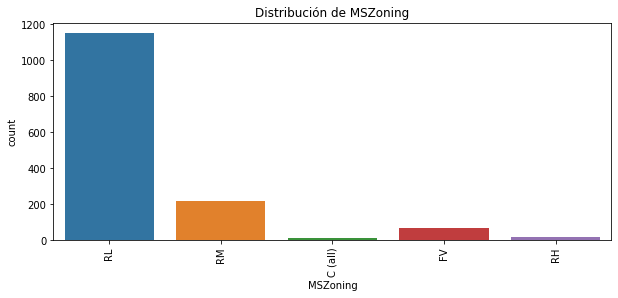

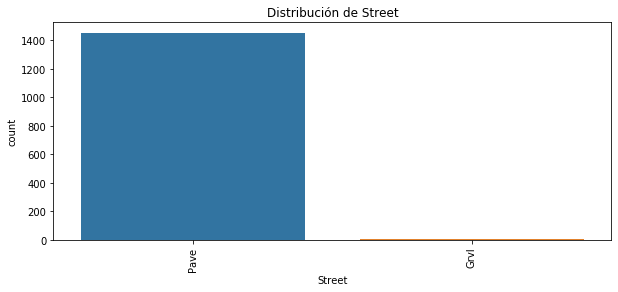

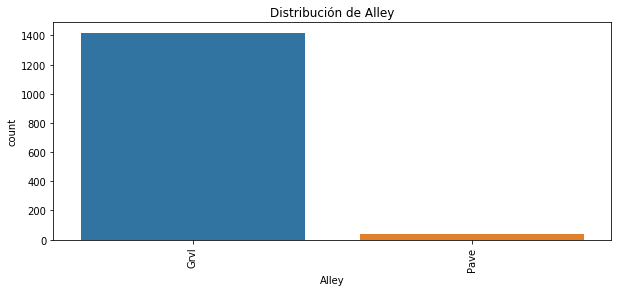

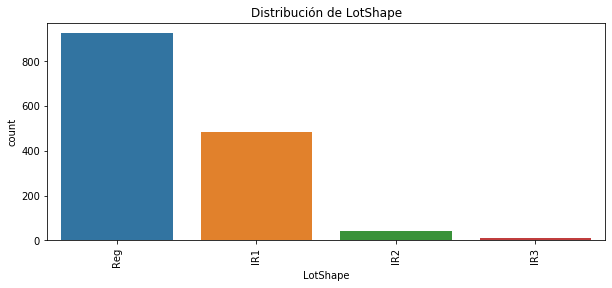

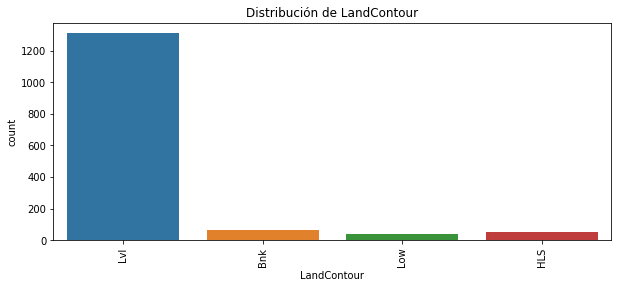

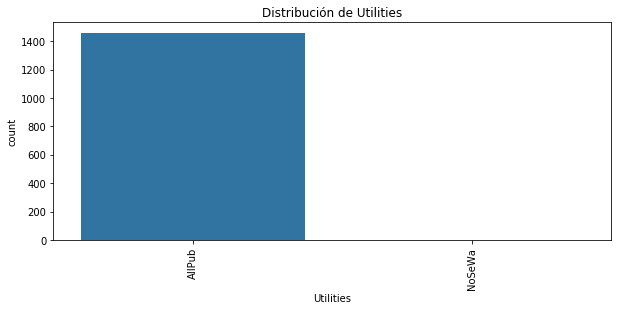

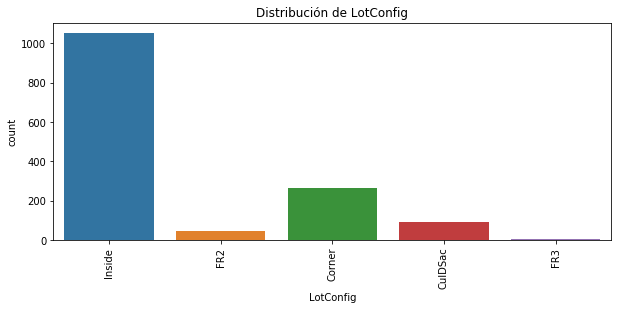

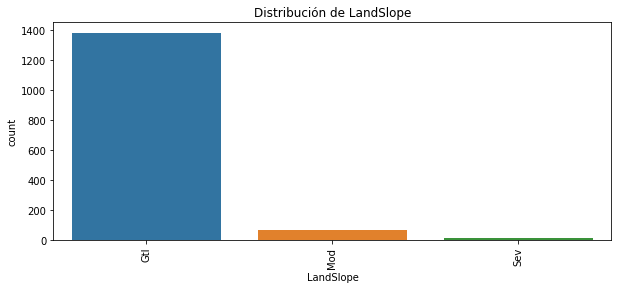

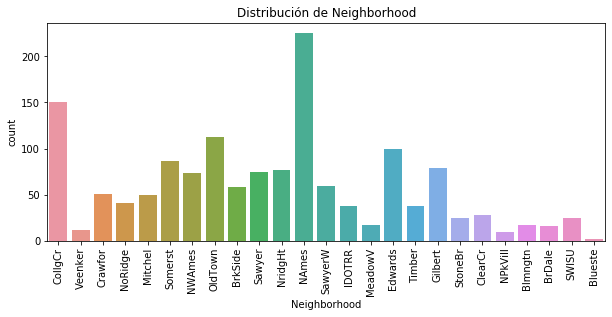

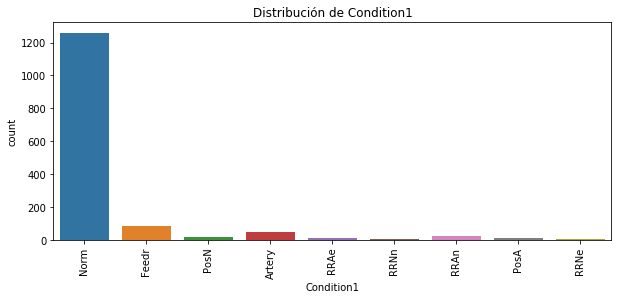

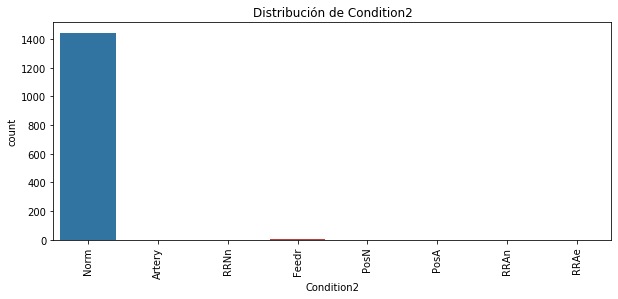

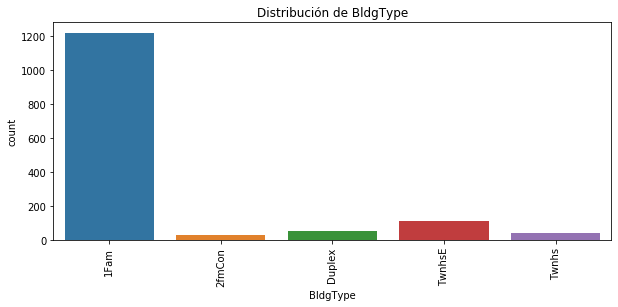

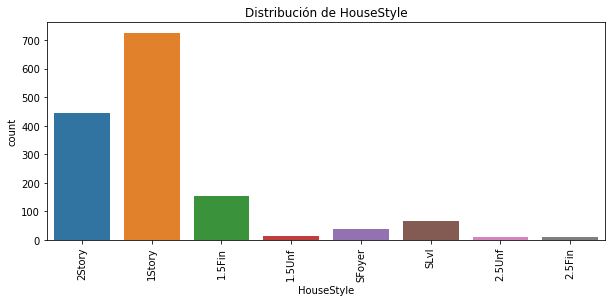

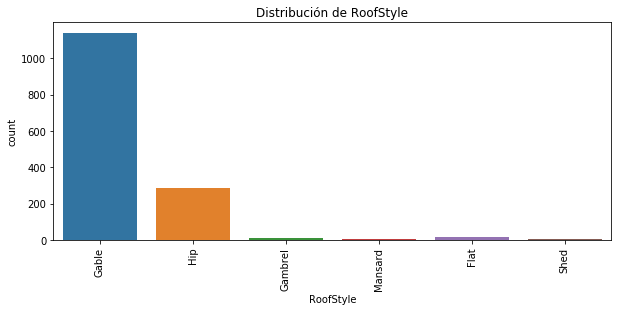

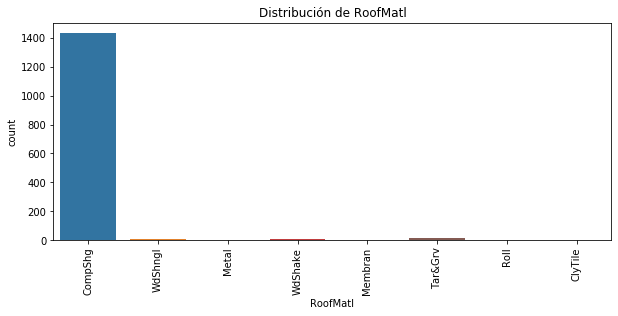

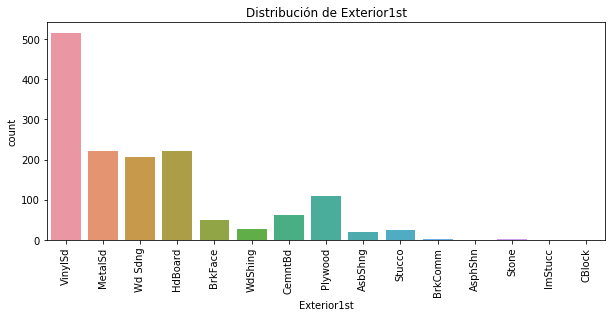

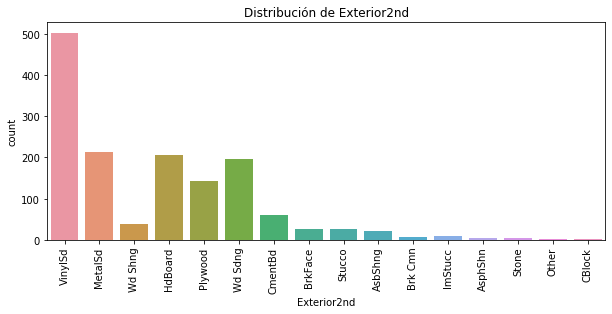

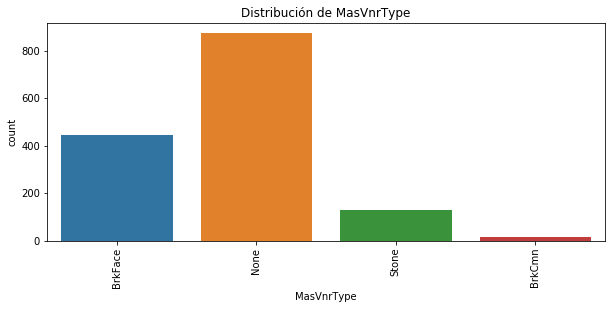

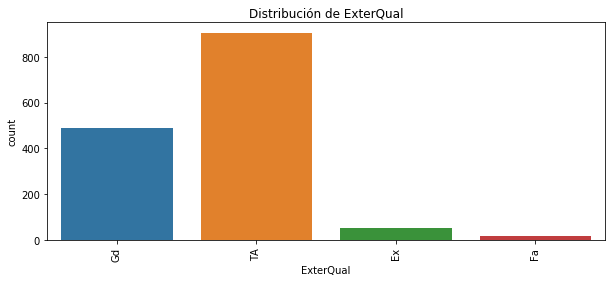

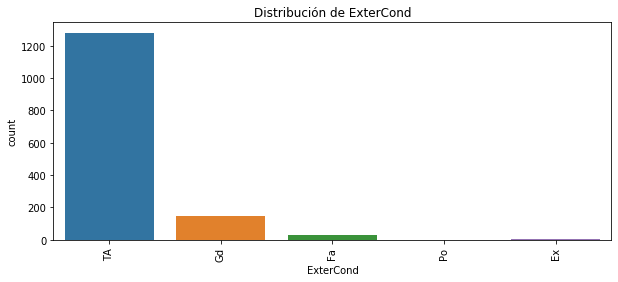

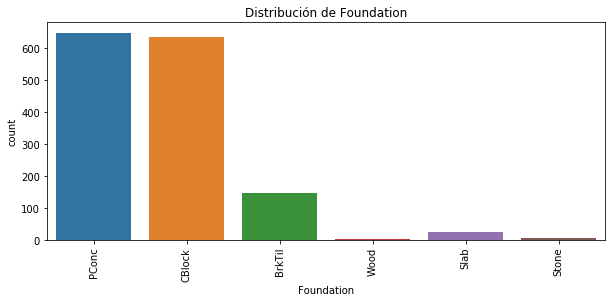

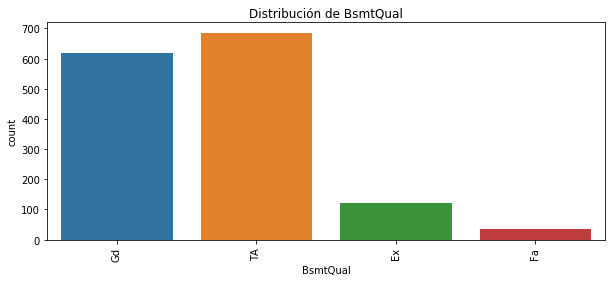

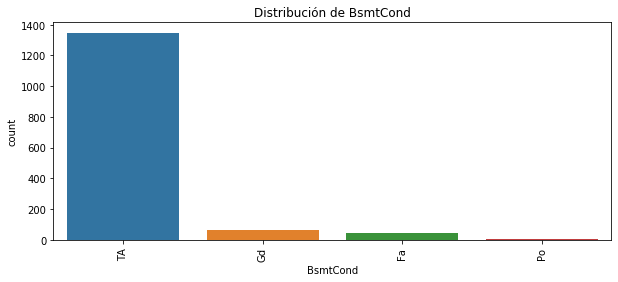

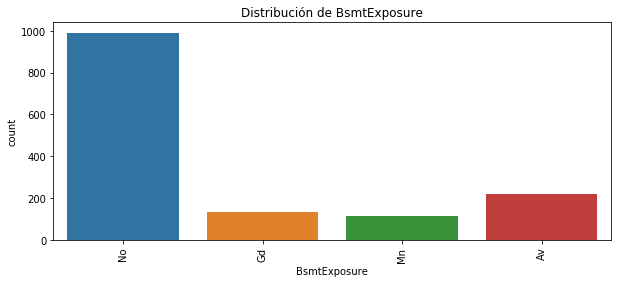

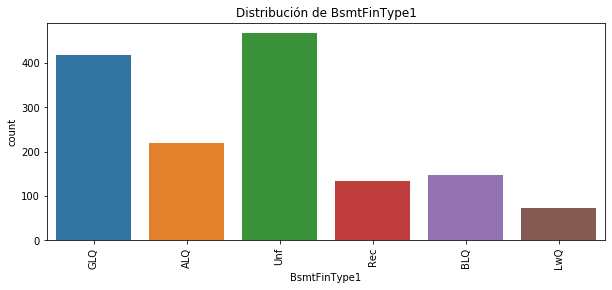

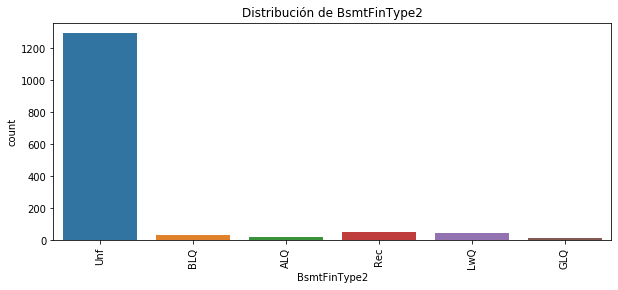

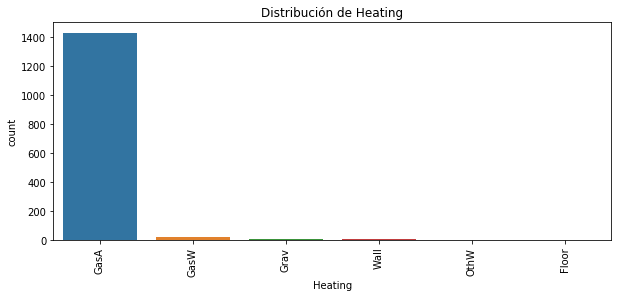

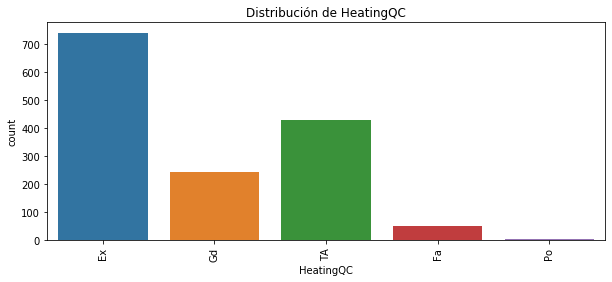

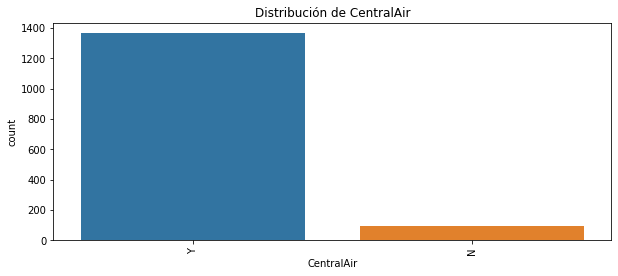

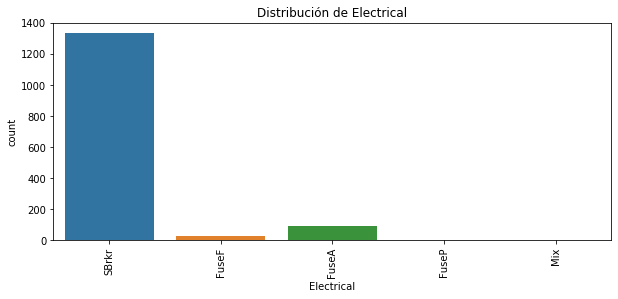

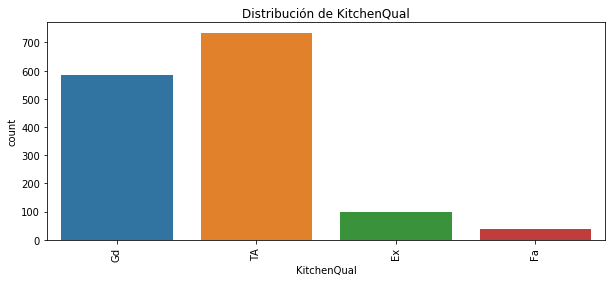

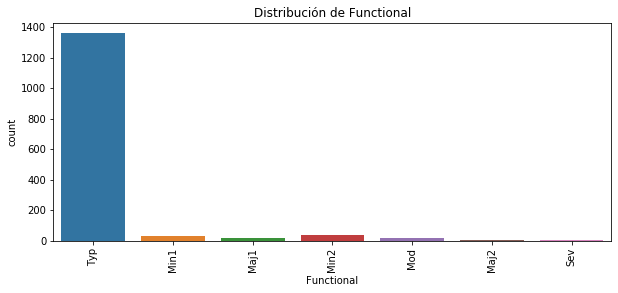

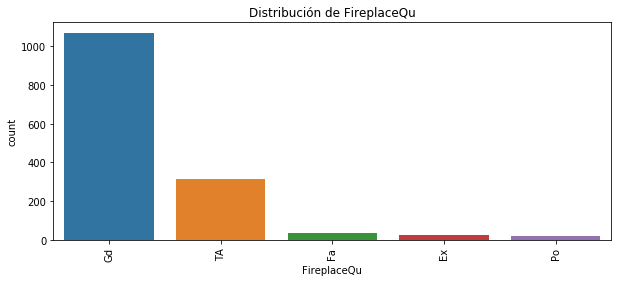

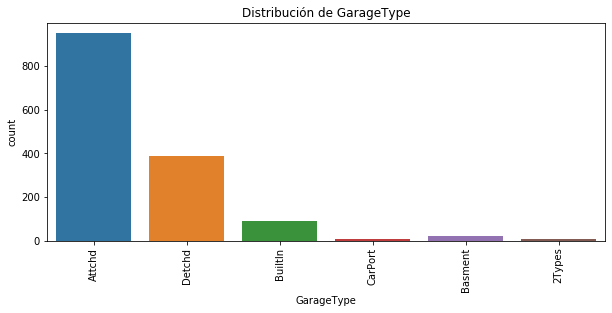

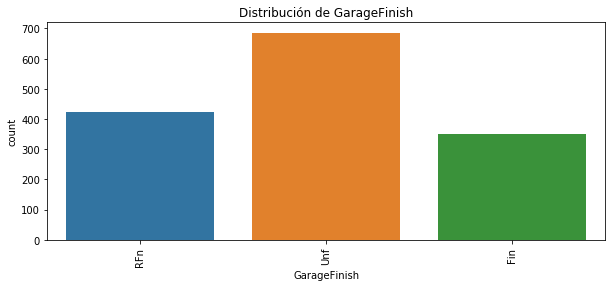

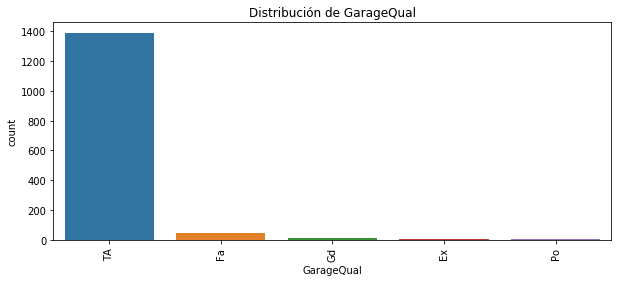

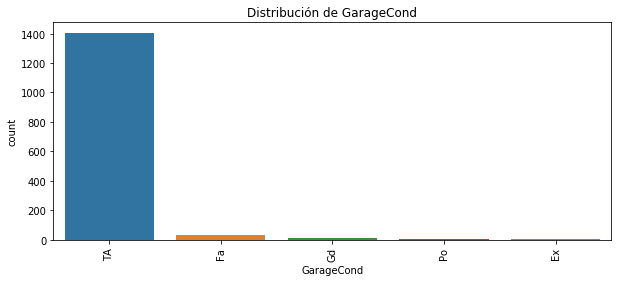

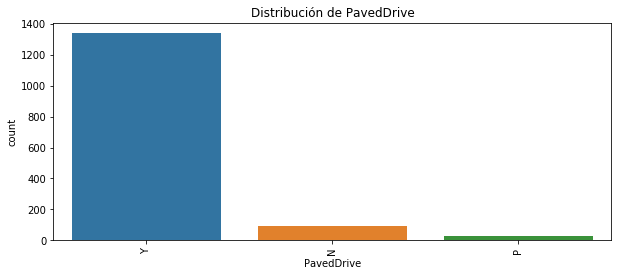

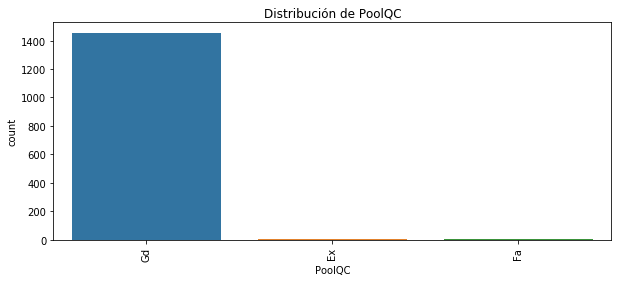

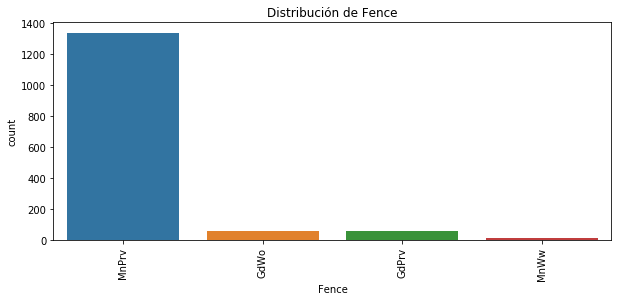

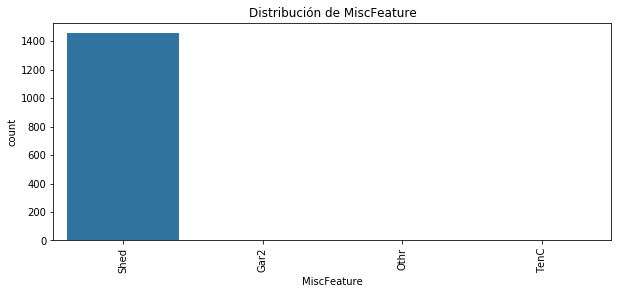

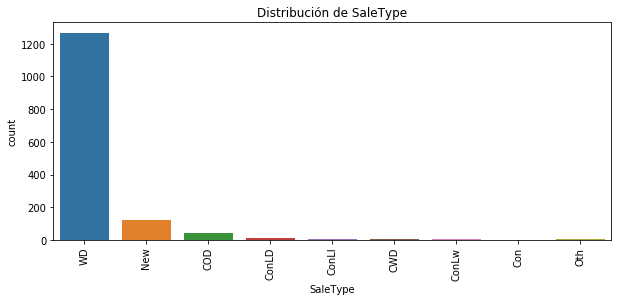

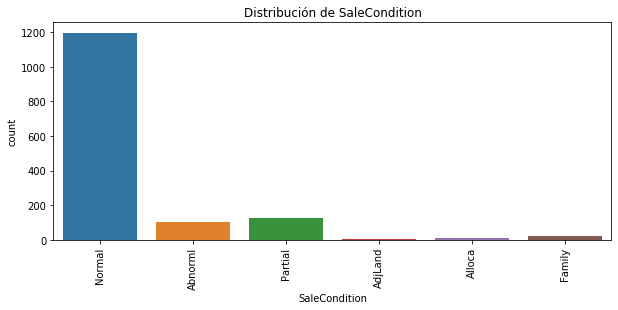

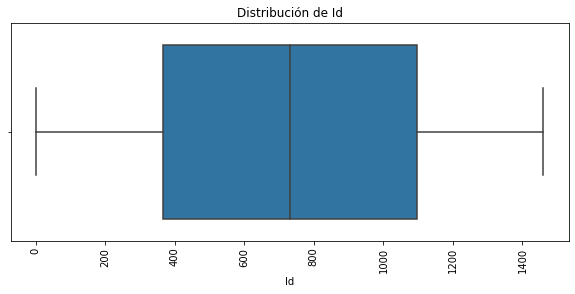

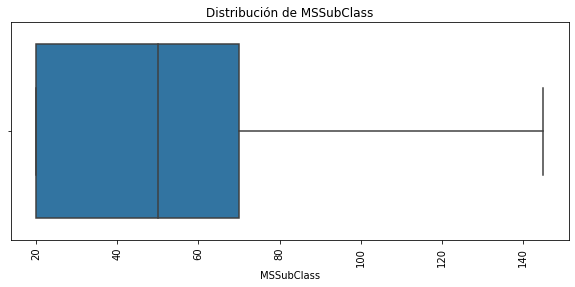

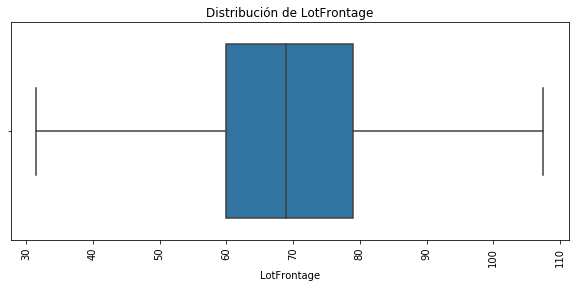

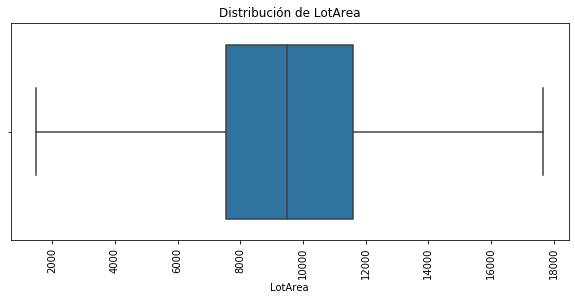

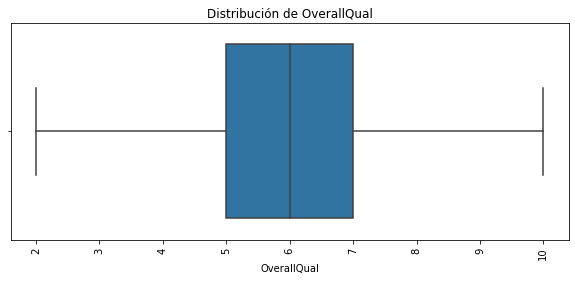

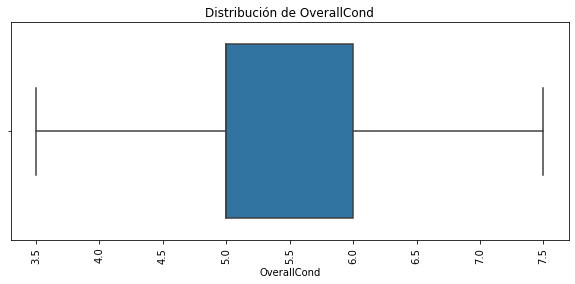

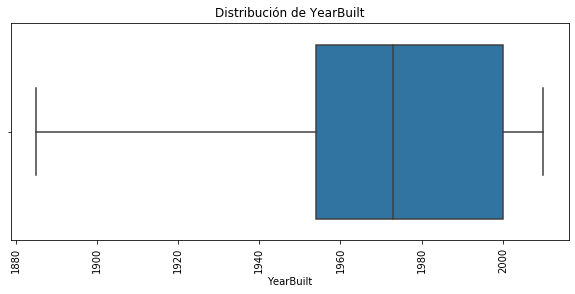

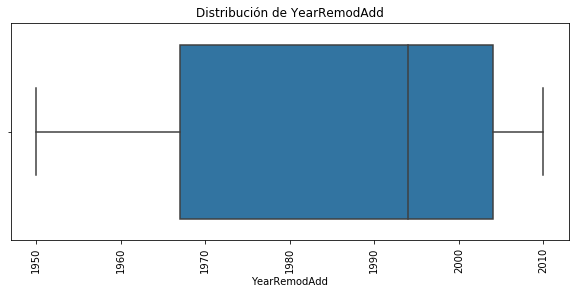

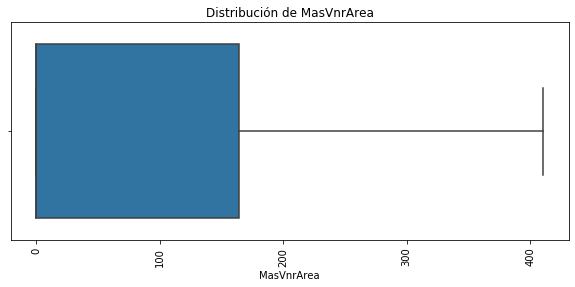

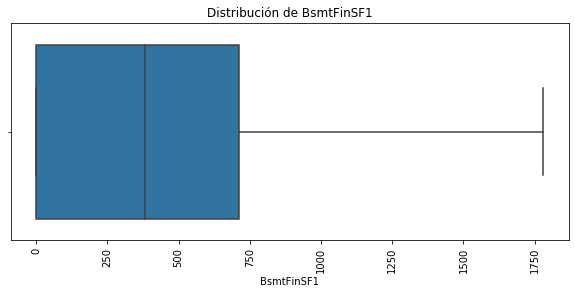

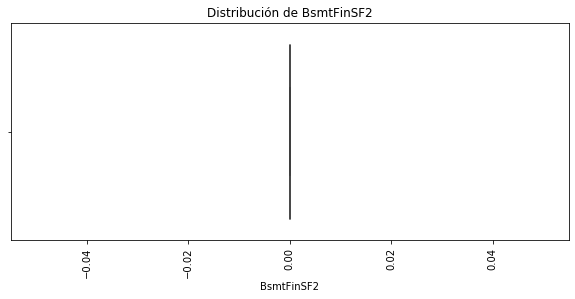

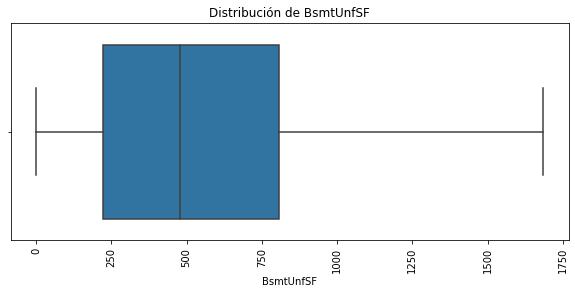

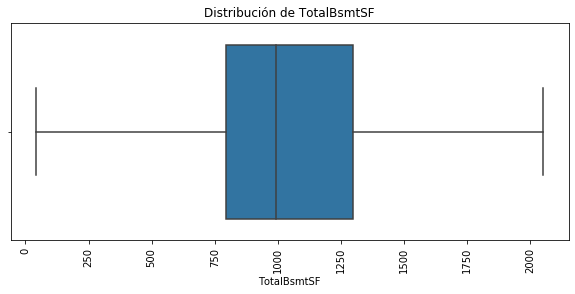

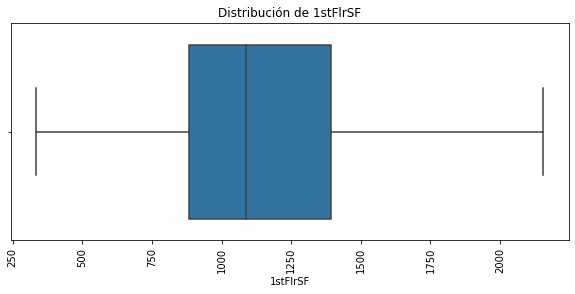

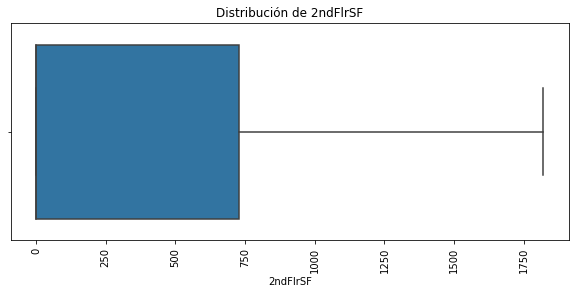

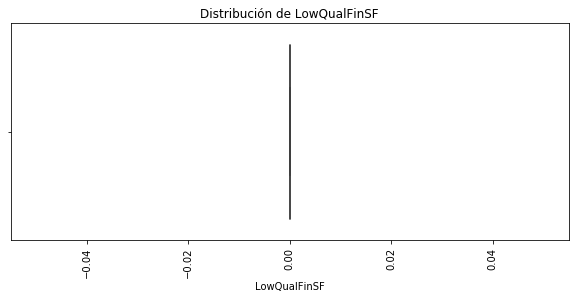

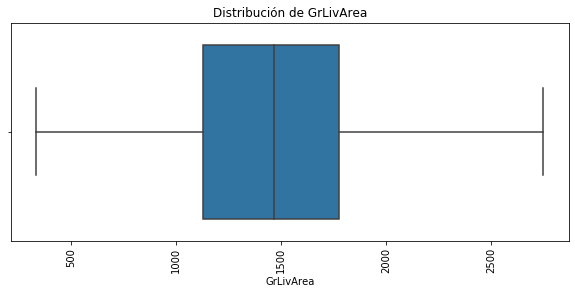

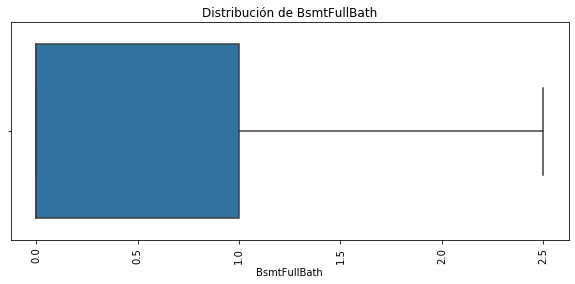

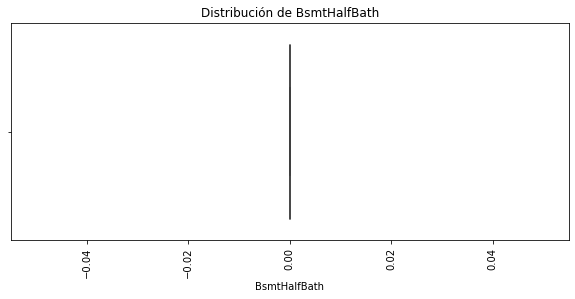

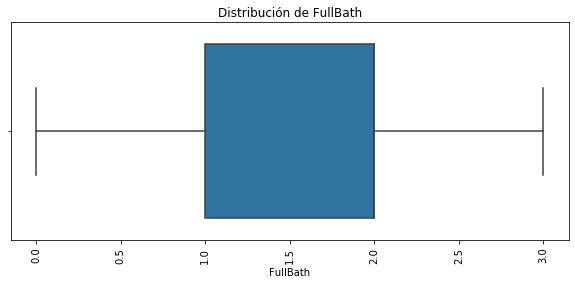

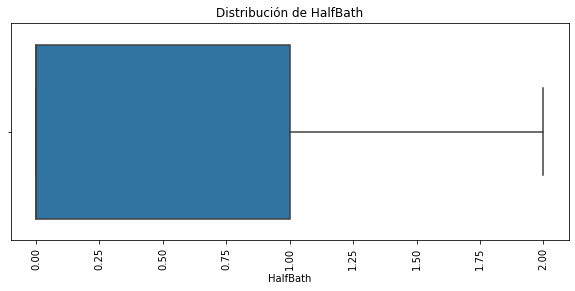

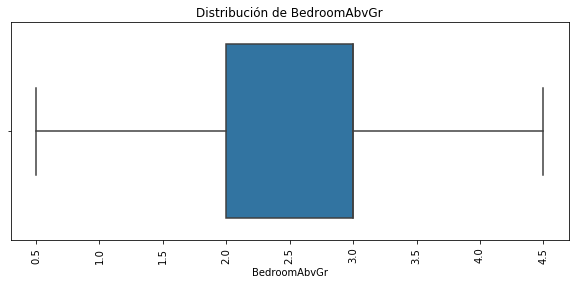

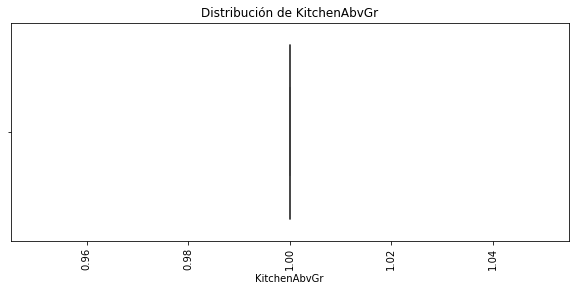

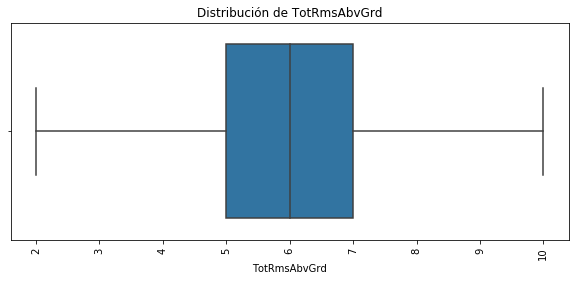

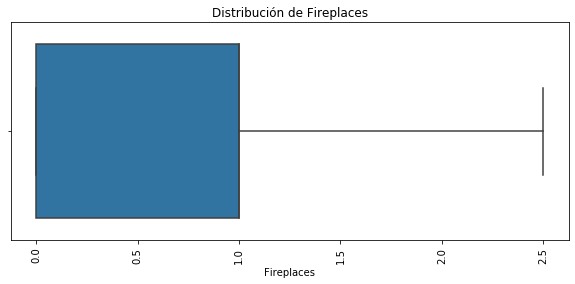

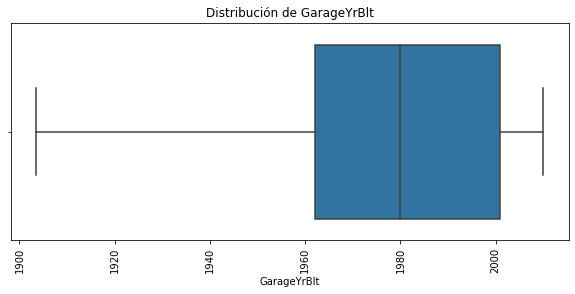

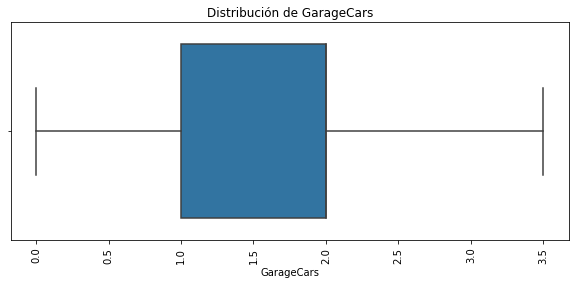

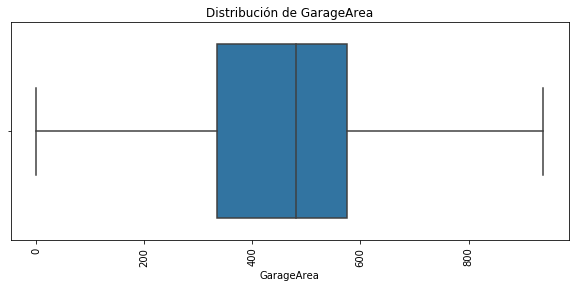

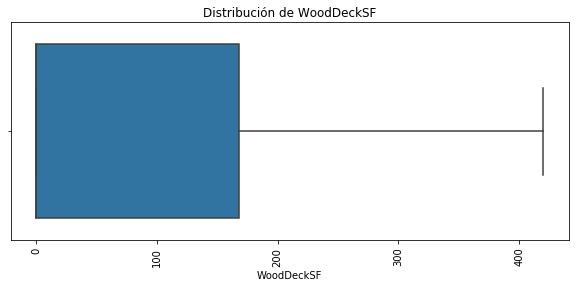

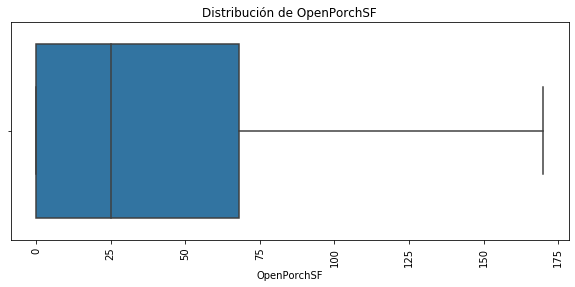

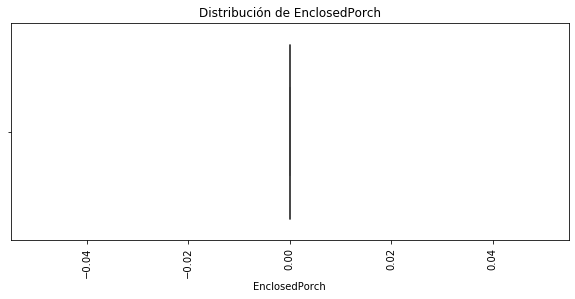

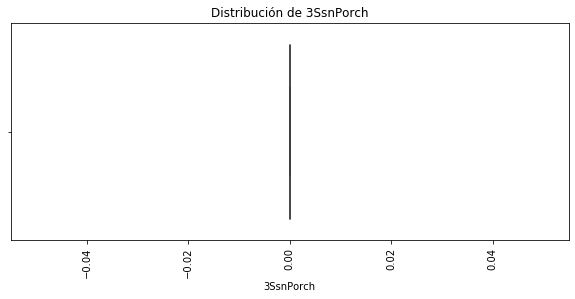

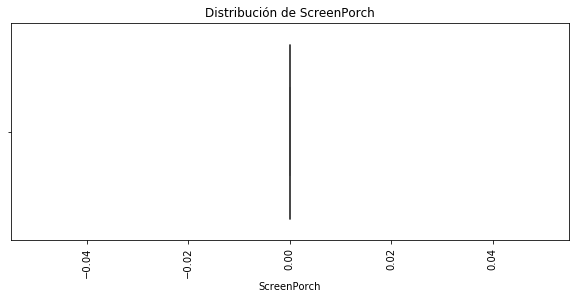

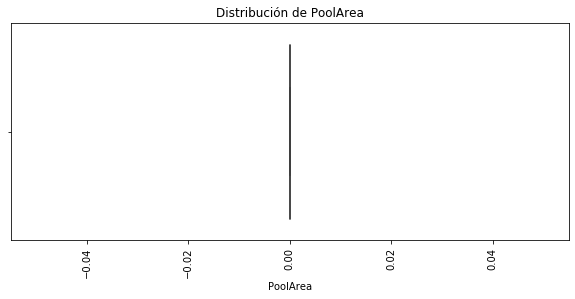

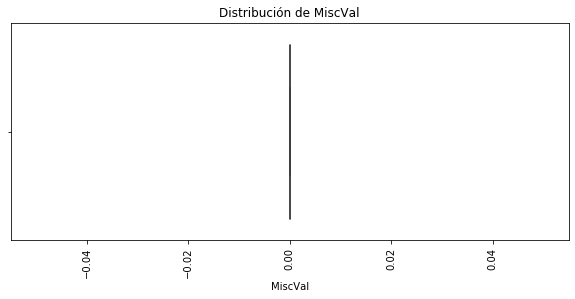

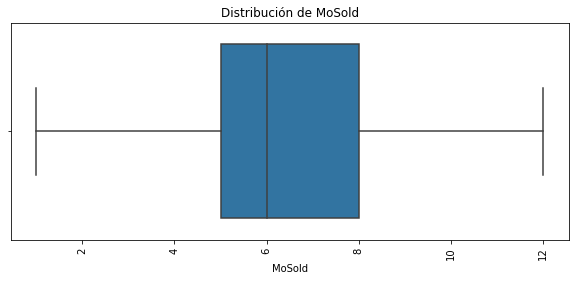

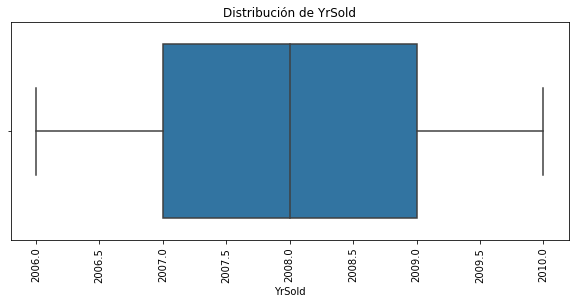

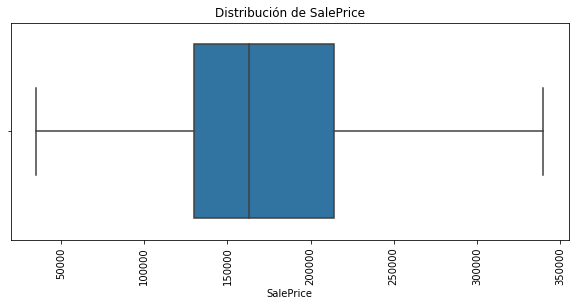

In [25]:
# Gráficos de barras para las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)
    plt.show()

# Gráficos de caja para las variables numéricas
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)
    plt.show()


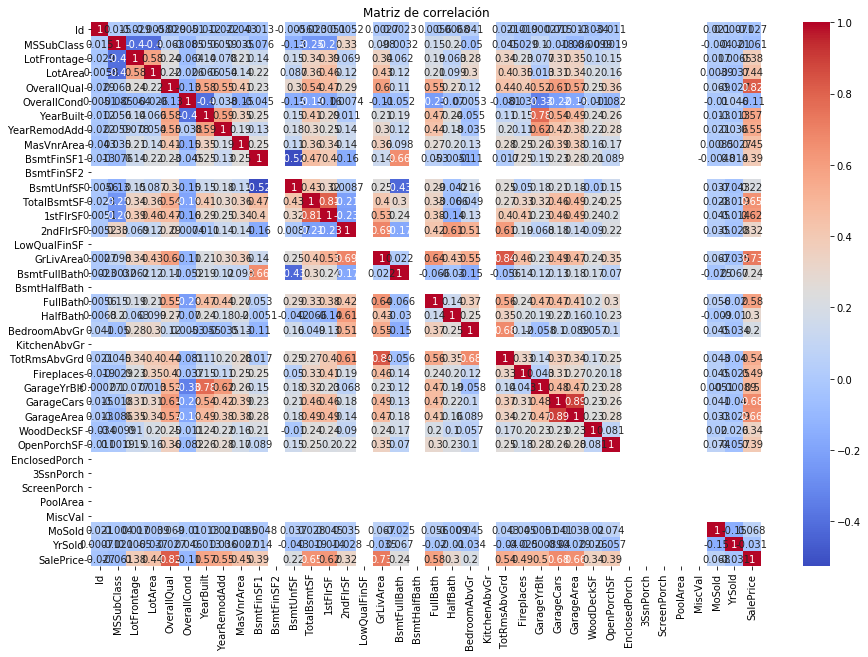

In [26]:
# Matriz de correlación
correlation = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()